In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

/home/shaheer/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('../heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Description of the data

* Age: the persons age in years
* Sex: Gender of the person
    `1 = Male, 0= Female`
* CP: Chest pain experienced
    `1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic`
* Trestbps: The person's resting blood pressure(mm Hg)
* Chol: the person's cholestrol management in mg/dl]
* Fbs: Fasting blood sugar `(>120 mg/dl, 1=True, 0=False)`
* restecg: Resting electrocardiographic measurement `(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)`
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina `(1 = yes; 0 = no)`
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.
* slope: the slope of the peak exercise ST segment `(Value 1: upsloping, Value 2: flat, Value 3: downsloping)`
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia `(3 = normal; 6 = fixed defect; 7 = reversable defect)`
* target: tells whether patient has heart disease or not 
    `0 = False, 1 = True`

In [3]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
data.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

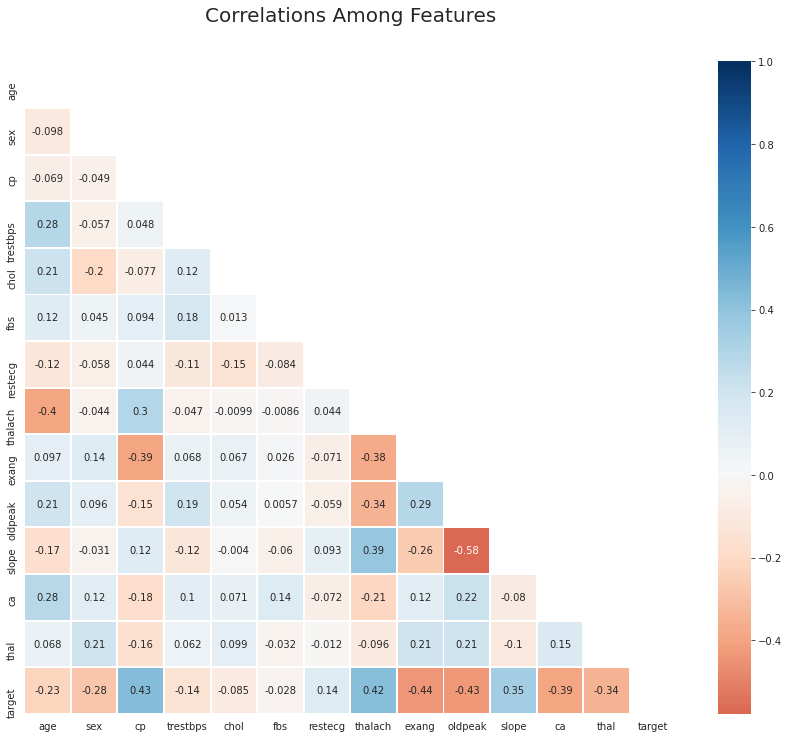

In [5]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', 
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [6]:
chest_pain = pd.get_dummies(data['cp'])

In [7]:
chest_pain

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [8]:
chest_pain.columns = ['Typical Aginal','Atypical-Aginal','Non-Aginal','Asymptomatic']

In [9]:
fasting_blood_sugar = pd.get_dummies(data['fbs'])

In [10]:
fasting_blood_sugar.columns = ['Lower than 120 gm/dl','Higher than 120 gm/dl']

In [11]:
fasting_blood_sugar

,Lower than 120 gm/dl,Higher than 120 gm/dl
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
298,1,0
299,1,0
300,0,1
301,1,0


In [12]:
rest_ecg = pd.get_dummies(data['restecg'])

In [13]:
rest_ecg.columns = ['Normal','Having ST-T wave abnormality','eft ventricular hypertrophy by Estes']

In [14]:
rest_ecg

,Normal,Having ST-T wave abnormality,eft ventricular hypertrophy by Estes
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
298,0,1,0
299,0,1,0
300,0,1,0
301,0,1,0


In [15]:
slope_ = pd.get_dummies(data['slope'])

In [16]:
slope_.columns = ['upsloping','flat','downsloping']

In [17]:
slope_

,upsloping,flat,downsloping
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
298,0,1,0
299,0,1,0
300,0,1,0
301,0,1,0


In [18]:
thalassemia = pd.get_dummies(data['thal'],drop_first=True)

In [19]:
thalassemia.columns = ['Normal','Defect','Reversable defect']

In [20]:
thalassemia

,Normal,Defect,Reversable defect
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
298,0,0,1
299,0,0,1
300,0,0,1
301,0,0,1


In [21]:
data = pd.concat([data,chest_pain,fasting_blood_sugar,rest_ecg,slope_,thalassemia],axis=1)

In [22]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Higher than 120 gm/dl,Normal,Having ST-T wave abnormality,eft ventricular hypertrophy by Estes,upsloping,flat,downsloping,Normal,Defect,Reversable defect
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,0,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,1,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,1,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,1,0,0,1,0,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,...,0,0,1,0,0,1,0,0,0,1
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,1,0,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,1,0,0,1,0,0,0,1


In [23]:
data=data.drop(['cp','fbs','restecg','slope','thal'],axis=1)

In [24]:
data

,age,sex,trestbps,chol,thalach,exang,oldpeak,ca,target,Typical Aginal,...,Higher than 120 gm/dl,Normal,Having ST-T wave abnormality,eft ventricular hypertrophy by Estes,upsloping,flat,downsloping,Normal,Defect,Reversable defect
0,63,1,145,233,150,0,2.3,0,1,0,...,1,1,0,0,1,0,0,1,0,0
1,37,1,130,250,187,0,3.5,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,172,0,1.4,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,56,1,120,236,178,0,0.8,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,163,1,0.6,0,1,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,123,1,0.2,0,0,1,...,0,0,1,0,0,1,0,0,0,1
299,45,1,110,264,132,0,1.2,0,0,0,...,0,0,1,0,0,1,0,0,0,1
300,68,1,144,193,141,0,3.4,2,0,1,...,1,0,1,0,0,1,0,0,0,1
301,57,1,130,131,115,1,1.2,1,0,1,...,0,0,1,0,0,1,0,0,0,1


In [25]:
x = data.drop('target',axis=1)

In [26]:
y = data['target']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)


In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [30]:
preds = knn.predict(x_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62        32
           1       0.59      0.66      0.62        29

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.63      0.62      0.62        61



In [32]:
print(confusion_matrix(preds,y_test))

[[19 13]
 [10 19]]


In [37]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [38]:
error_rate

[0.3770491803278688,
 0.36065573770491804,
 0.3442622950819672,
 0.32786885245901637,
 0.3114754098360656,
 0.2786885245901639,
 0.29508196721311475,
 0.3114754098360656,
 0.32786885245901637,
 0.29508196721311475,
 0.2459016393442623,
 0.26229508196721313,
 0.26229508196721313,
 0.26229508196721313,
 0.3114754098360656,
 0.2786885245901639,
 0.3114754098360656,
 0.3114754098360656,
 0.29508196721311475,
 0.3442622950819672,
 0.29508196721311475,
 0.2786885245901639,
 0.2786885245901639,
 0.2786885245901639,
 0.29508196721311475,
 0.2786885245901639,
 0.2786885245901639,
 0.29508196721311475,
 0.29508196721311475,
 0.2786885245901639,
 0.29508196721311475,
 0.29508196721311475,
 0.29508196721311475,
 0.29508196721311475,
 0.3114754098360656,
 0.2786885245901639,
 0.3114754098360656,
 0.3114754098360656,
 0.3114754098360656]

Text(0, 0.5, 'Error Rate')

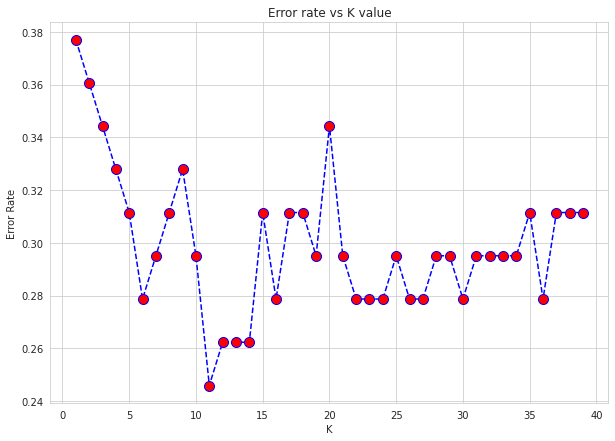

In [40]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [57]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [58]:
preds = knn.predict(x_test)

In [59]:
print(confusion_matrix(preds,y_test))

[[20  6]
 [ 9 26]]


In [60]:
def plot_confusion_matrix(y_test,y_results):
    """
    Plotting the confusion matrix
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_results),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

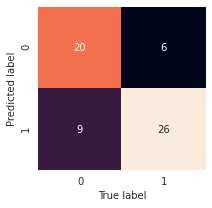

In [61]:
plot_confusion_matrix(preds,y_test)

In [62]:
knn.score(x_train,y_train)

0.7272727272727273